# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [3]:
x__y0 = np.random.multivariate_normal(m2, sigma, 500)
x__y1 = np.random.multivariate_normal(m1, sigma, 500)

# sampling
X_generative = np.concatenate([x__y0, x__y1], axis=0)
Y_generative = np.concatenate([-np.ones(500), np.ones(500)])

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


In [4]:
# Answer: yes, it corresponds

#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [5]:
# computing beta_0 and beta using the formulas

pi = (Y_generative == 1).sum() / Y_generative.shape[0]

sigma_inv = np.linalg.inv(sigma)

beta_0 = np.log(pi / (1 - pi)) + 0.5 * m2.T @ sigma_inv @ m2 - 0.5 * m1.T @ sigma_inv @ m1
beta = sigma_inv @ (m1 - m2)

beta_0, beta

(-2.0, array([2., 2.]))

In [6]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-1.91324692]), array([[1.94627925, 1.79556671]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [7]:
# sampling
y = np.random.binomial(1, 0.5, 1000)
cond = y == 0
cond = np.vstack([cond] * 2).T
x__y0 = np.random.multivariate_normal(m1, sigma, 1000)
x__y1 = np.random.multivariate_normal(m2, sigma, 1000)

X_disciminative = np.where(cond, x__y0, x__y1)


beta = np.array([2, 2])
beta_0 = -2
p = 1 / (1 + np.exp(-beta_0 - beta @ X_disciminative.T))

Y_discriminative = np.random.binomial(1, p)

In [8]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_disciminative, Y_discriminative)
(mod_b.intercept_, mod_b.coef_)

(array([-2.07800329]), array([[2.00965212, 2.01942256]]))

#### Second bullet point

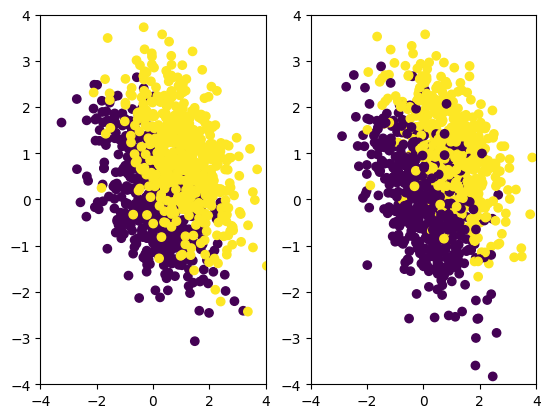

In [9]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:, 0], X_generative[:, 1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_disciminative[:, 0], X_disciminative[:, 1] , c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

In [10]:
# Answer:
# in discriminative approach, pi ( prior probability p(y=1|x) ) can be estimated
# in generative approach, we know exactly how many samples we will have from each class

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

**Q1.** What is the distribution of $f_{X|Y=1}$?
 
A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

**Q1 Answer:** From *lab1_notebook_answers.ipynb*:
$$ p(x|y=-1) = \frac{\pi \exp(-x)}{\exp(\beta_0+\beta_1 x)(1-\pi)} = C_{\beta_0, \pi} \exp(-(\beta_1+1)x)$$
$X$ given $Y=-1$ follows exponential distribution with $\lambda=\beta_1+1$.

**Q2.** Once $\pi$ is fixed, do we have freedom to choose an intercept in the logistic model thus constructed?

In general, exponential distribution density is given by: $f(x) = \lambda \exp(-\lambda x)$.

Since $X$ given $Y=-1$ follows exponential distribution with $\lambda=\beta_1+1$, the following equatation is true:
$$ C_{\beta_0, \pi} = \beta_1+1 $$
But also:
$$\frac{\pi \exp(-x)}{\exp(\beta_0+\beta_1 x)(1-\pi)} = C_{\beta_0, \pi} \exp(-(\beta_1+1)x)$$
$$\frac{\pi}{\exp(\beta_0)(1 - \pi)} \cdot \frac{\exp(-x)}{\exp(\beta_1 x)} = C_{\beta_0, \pi} \exp(-(\beta_1+1)x)$$
$$\frac{\pi}{\exp(\beta_0)(1 - \pi)} \cdot \exp(-(\beta_1+1)x) = C_{\beta_0, \pi} \exp(-(\beta_1+1)x)$$

$$ C_{\beta_0, \pi} = \frac{\pi}{\exp(\beta_0)(1 - \pi)} $$
Combining these two equations:
$$ \beta_1+1 = \frac{\pi}{\exp(\beta_0)(1 - \pi)} $$
$$ \beta_0 = \log \left( \frac{\pi}{(\beta_1 + 1)(1 - \pi)} \right) $$


**Q2 Answer:** Once $\pi$ is fixed, we do not have freedom to choose intercept in this model. 

**Q3.** If $\pi$ is not given, is the intercept in the logistic model uniquely determined?

**Q3 Answer:** No, the intercept is not uniquely determined. Intercept $\beta_0$ depends on $\pi$.

**Homework**: find $C_{\beta_0, \pi}$. Next, knowing that $C_{\beta_0, \pi} = \beta_1+1$, derive the formula for $\beta_0$.

**Homework Answer:**
$$ C_{\beta_0, \pi} = \frac{\pi}{\exp(\beta_0)(1 - \pi)} $$
$$ \beta_0 = \log \left( \frac{\pi}{(\beta_1 + 1)(1 - \pi)} \right) $$

In [11]:
# sampling

beta1 = 1
n1 = 1000
x1 = np.random.exponential(1, size=n1)
n2 = 2000
x2 = np.random.exponential(1/(beta1 + 1), size=n2)
X = np.concatenate([x1, x2]).reshape(-1, 1)
y = np.concatenate([np.ones(n1), np.zeros(n2)])

In [12]:
# a model
mod = LogisticRegression(penalty=None)
mod.fit(X, y)
(mod.intercept_, mod.coef_)

(array([-1.38487516]), array([[1.0112968]]))

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

In [14]:
beta1 = 1
pi_c = n1/(n1 + n2)
beta0 = np.log( pi_c / ( (beta1 + 1)*(1 - pi_c) ) )
beta0

-1.3862943611198908